<a href="https://colab.research.google.com/github/padthamapornmei/Tool-Science/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kagglee.json to kagglee.json


{'kagglee.json': b'{"username":"benyapafaksawat","key":"dfb55ebeb52cfb9d279a18712b1fbfb3"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kagglee.json ~/.kaggle/
!chmod 600 ~/.kaggle/kagglee.json

In [ ]:
!ls -l ~/.kaggle #ตรวจสอบว่ามีข้อมูลแล้วเฉยๆจ้า

total 4
-rw------- 1 root root 71 Mar 13 10:03 kagglee.json


In [ ]:
!kaggle datasets download neuromusic/avocado-prices

Dataset URL: https://www.kaggle.com/datasets/neuromusic/avocado-prices
License(s): ODbL-1.0
100% 629k/629k [00:00<00:00, 1.05MB/s]
100% 629k/629k [00:00<00:00, 1.05MB/s]


In [ ]:
!unzip avocado-prices.zip

Archive:  avocado-prices.zip
  inflating: avocado.csv             


In [ ]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ "avocado.csv"
df = pd.read_csv("avocado.csv")

# แสดง 5 แถวแรก
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# แสดงคอลัมน์และประเภทข้อมูล
print(df.info())

# แสดงสถิติพื้นฐาน
print(df.describe().to_markdown(numalign="left", stralign="left"))

| Unnamed: 0   | Date       | AveragePrice   | Total Volume   | 4046    | 4225    | 4770   | Total Bags   | Small Bags   | Large Bags   | XLarge Bags   | type         | year   | region   |
|:-------------|:-----------|:---------------|:---------------|:--------|:--------|:-------|:-------------|:-------------|:-------------|:--------------|:-------------|:-------|:---------|
| 0            | 2015-12-27 | 1.33           | 64236.6        | 1036.74 | 54454.8 | 48.16  | 8696.87      | 8603.62      | 93.25        | 0             | conventional | 2015   | Albany   |
| 1            | 2015-12-20 | 1.35           | 54877          | 674.28  | 44638.8 | 58.33  | 9505.56      | 9408.07      | 97.49        | 0             | conventional | 2015   | Albany   |
| 2            | 2015-12-13 | 0.93           | 118220         | 794.7   | 109150  | 130.5  | 8145.35      | 8042.21      | 103.14       | 0             | conventional | 2015   | Albany   |
| 3            | 2015-12-06 | 1.08           | 78992.1 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("avocado.csv")

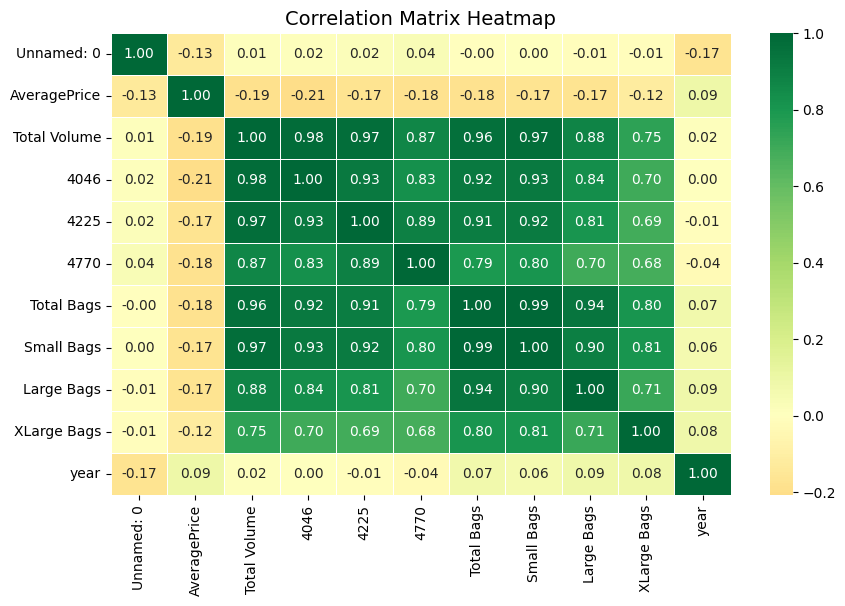

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# คำนวณตาราง Correlation เฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

# วาด Heatmap แปรผันตรงเป็นสีเขียว แปลผกผันเป็นสีแดง
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5, center=0)

# ตั้งชื่อกราฟ
plt.title('Correlation Matrix Heatmap', fontsize=14)

plt.show()

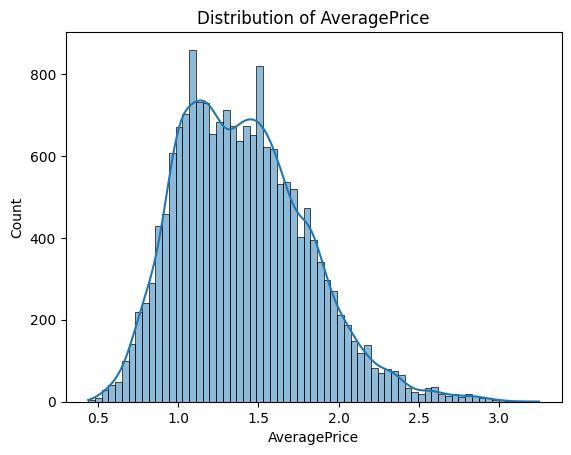

In [ ]:
#ดูการกระจายของราคา
sns.histplot(df['AveragePrice'], kde=True)
plt.title('Distribution of AveragePrice')
plt.show()

In [ ]:
-การกระจายแบบเบ้ขวา (Right Skewed): กราฟแสดงให้เห็นว่าการกระจายของราคาเฉลี่ยเบ้ไปทางขวา นั่นหมายความว่ามีอะโวคาโดส่วนใหญ่มีราคาเฉลี่ยอยู่ในช่วงต่ำ (ประมาณ 1.0 ถึง 1.5) และมีอะโวคาโดจำนวนน้อยที่มีราคาสูงกว่า
-ยอดเขา: ยอดเขาของกราฟอยู่ที่ประมาณ 1.0 ถึง 1.5 ซึ่งบ่งชี้ว่าช่วงนี้เป็นช่วงราคาเฉลี่ยที่มีความถี่สูงสุด
-ช่วงราคาที่พบได้บ่อย: จากกราฟ เราสามารถสรุปได้ว่าราคาเฉลี่ยของอะโวคาโดส่วนใหญ่จะอยู่ในช่วง 1.0 ถึง 2.0
-ค่าผิดปกติ (Outliers): มีข้อมูลบางส่วนที่ราคาสูงกว่า 2.5 ซึ่งอาจเป็นค่าผิดปกติหรือเป็นอะโวคาโดประเภทพิเศษที่มีราคาสูง

<ipython-input-47-7fa187d0c5c1>:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q', on='Date')['AveragePrice'].mean()


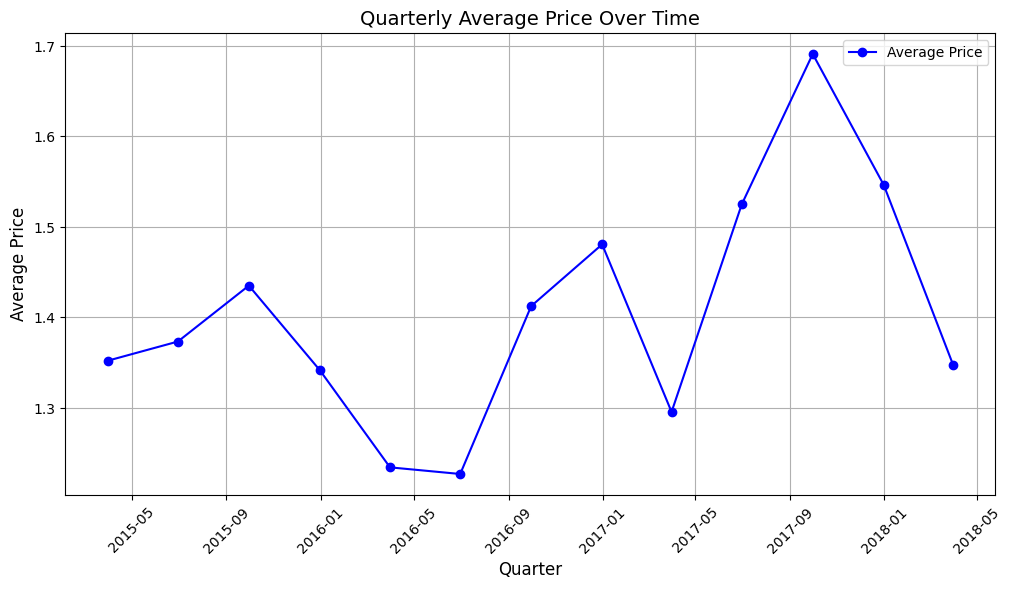

In [ ]:
#ดูแนวโน้มราคาตามเวลา
import pandas as pd
import matplotlib.pyplot as plt

# แปลง column 'Date' เป็น datetime และเรียงข้อมูล
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# รีแซมเปิลข้อมูลเป็นรายไตรมาส (Q) และคำนวณค่าเฉลี่ยเฉพาะคอลัมน์ 'AveragePrice'
df_quarterly = df.resample('Q', on='Date')['AveragePrice'].mean()

# พล็อตกราฟเส้น
plt.figure(figsize=(12, 6))
plt.plot(df_quarterly.index, df_quarterly, marker='o', linestyle='-', color='b', label='Average Price')

# ปรับแต่งกราฟ
plt.title('Quarterly Average Price Over Time', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # หมุนแกน X ให้ดูง่ายขึ้น

plt.show()

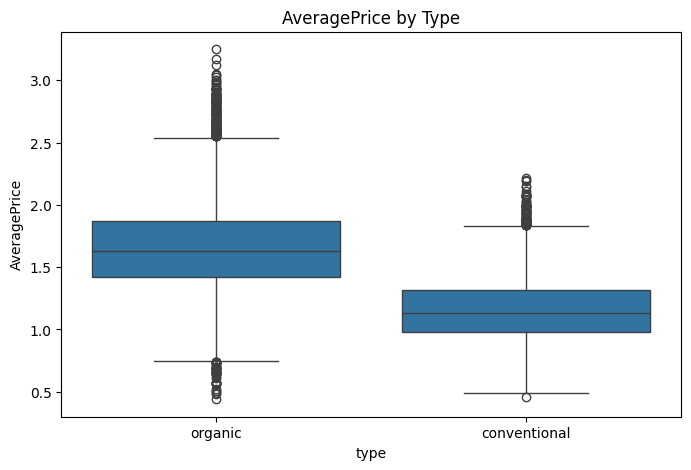

In [ ]:
#วิเคราะห์ราคาตามประเภท (type)
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('AveragePrice by Type')
plt.show()

<ipython-input-53-02f987ee099a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='AveragePrice', data=df, estimator=lambda x: sum(x) / len(x), ci=None, width=0.4)


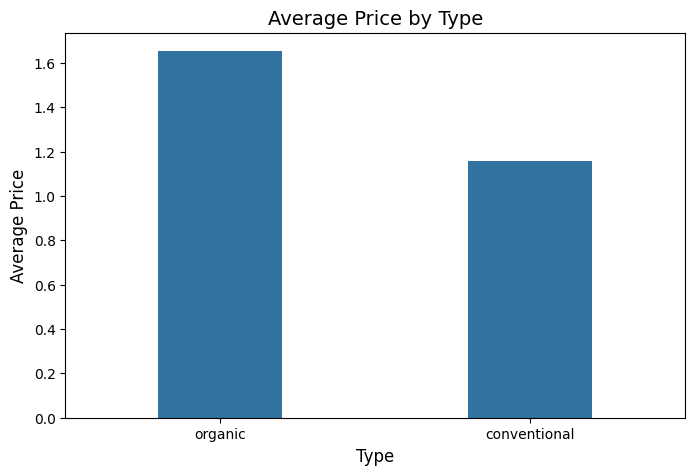

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # ขนาดกรอบกราฟ
sns.barplot(x='type', y='AveragePrice', data=df, estimator=lambda x: sum(x) / len(x), ci=None, width=0.4)

# ตั้งชื่อกราฟ
plt.title('Average Price by Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

In [ ]:
df_quarterly = df.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()

<ipython-input-58-0704d4905cbc>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()


<ipython-input-66-f1452bf23a22>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_prices.index, y=region_prices.values, palette=colors)
<ipython-input-66-f1452bf23a22>:15: UserWarning: 
The palette list has fewer values (6) than needed (54) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=region_prices.index, y=region_prices.values, palette=colors)


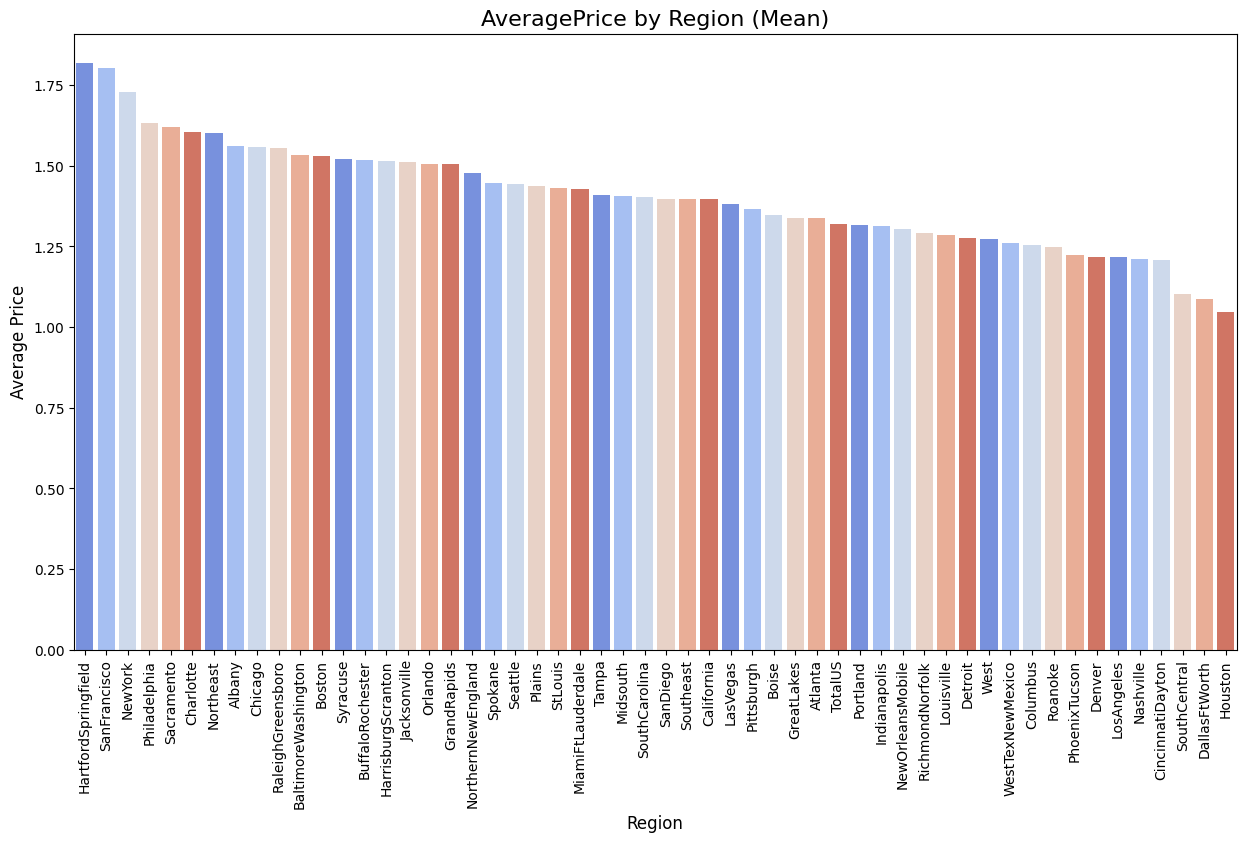

In [ ]:
#ดูค่าเฉลี่ยของราคาตามภูมิภาค
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณค่าเฉลี่ยราคาของแต่ละภูมิภาค
region_prices = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

# สร้าง color palette เพื่อกำหนดสีจากสีฟ้าถึงสีแดง
# 🎯 แก้ไข: ใช้ as_cmap=False เพื่อให้ได้ list ของสี
colors = sns.color_palette("coolwarm", as_cmap=False)

# สร้างกราฟ
plt.figure(figsize=(15, 8))
sns.barplot(x=region_prices.index, y=region_prices.values, palette=colors)

# ปรับแต่งกราฟ
plt.title('AveragePrice by Region (Mean)', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

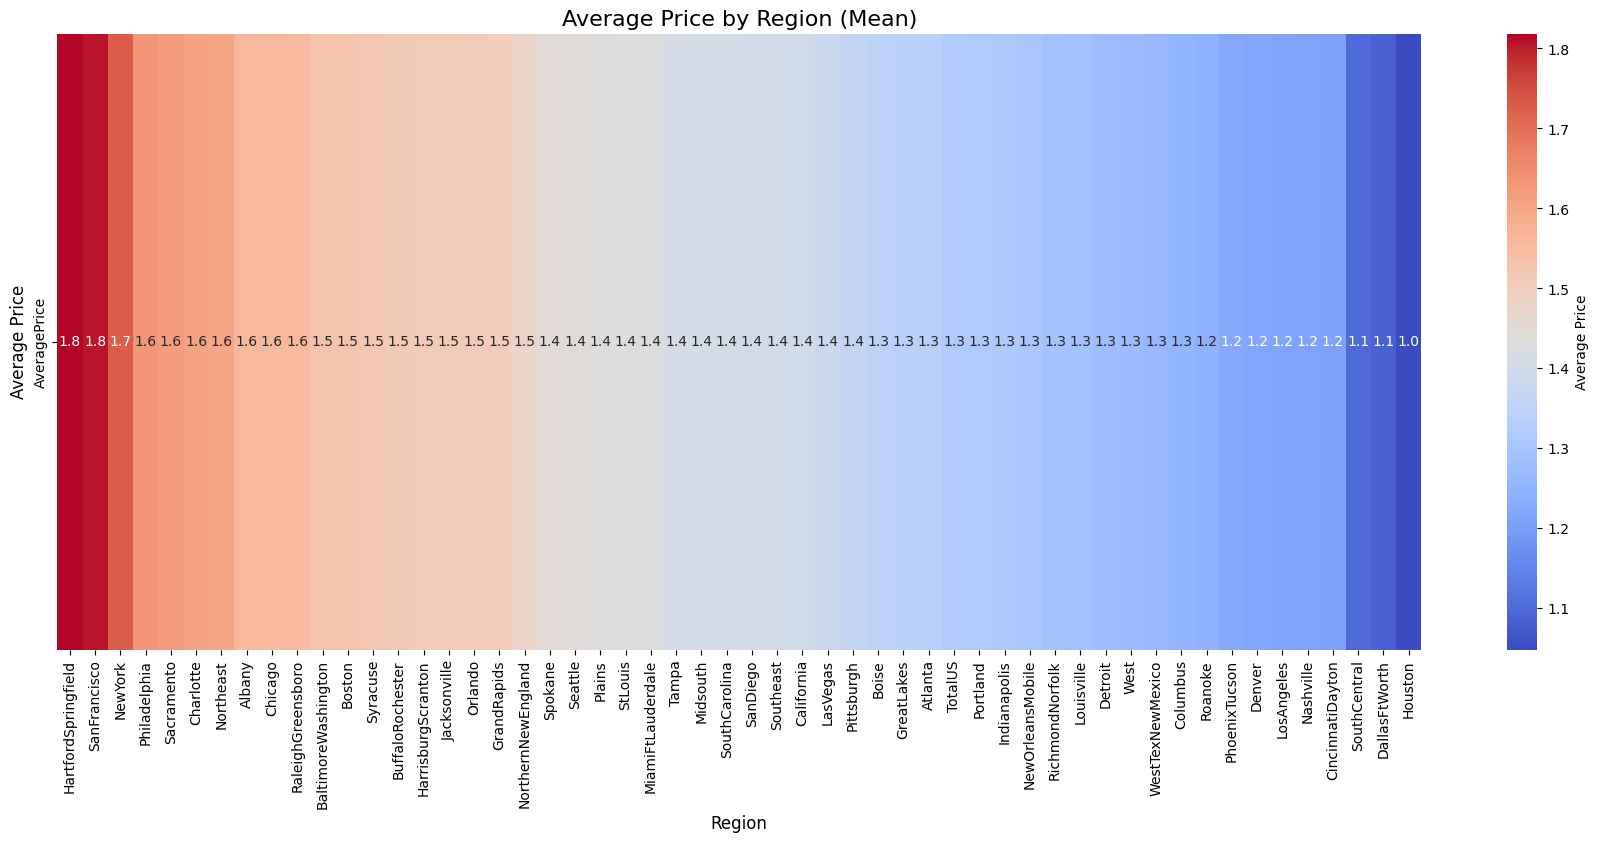

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณค่าเฉลี่ยราคาของแต่ละภูมิภาค
region_prices = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

# เปลี่ยนข้อมูลให้เป็นตารางที่เหมาะสมกับ heatmap
region_prices_df = region_prices.to_frame().T  # ทำให้ข้อมูลเป็นแถวเดียวใน DataFrame

# สร้าง Heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(region_prices_df, annot=True, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'Average Price'})

# ปรับแต่งกราฟ
plt.title('Average Price by Region (Mean)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

<ipython-input-123-97ed51a14ab0>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




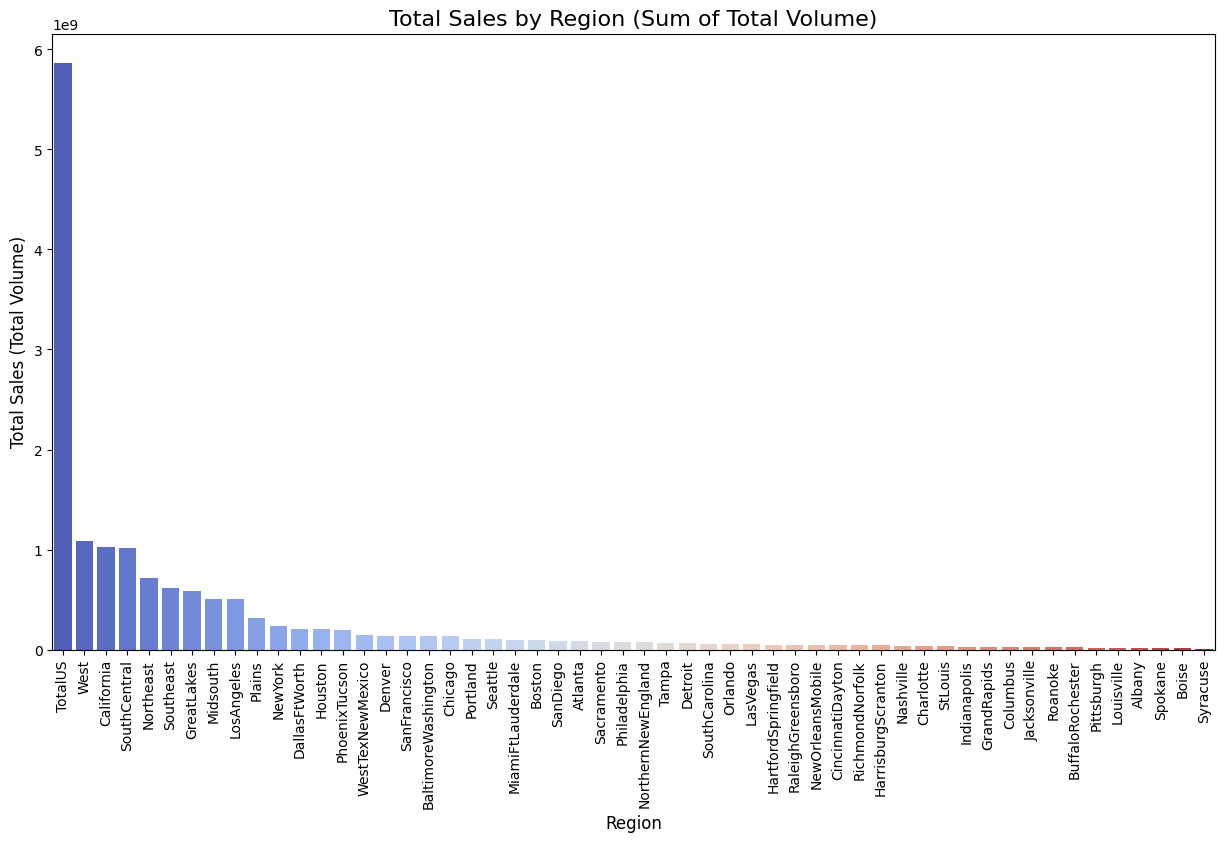

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณยอดขายรวมของแต่ละภูมิภาค
region_sales = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False)

# สร้างกราฟ Barplot เพื่อแสดงยอดขายรวม
plt.figure(figsize=(15, 8))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')

# ปรับแต่งกราฟ
plt.title('Total Sales by Region (Sum of Total Volume)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (Total Volume)', fontsize=12)
plt.xticks(rotation=90)  # หมุนชื่อภูมิภาคให้ไม่ทับกัน

# แสดงกราฟ
plt.show()


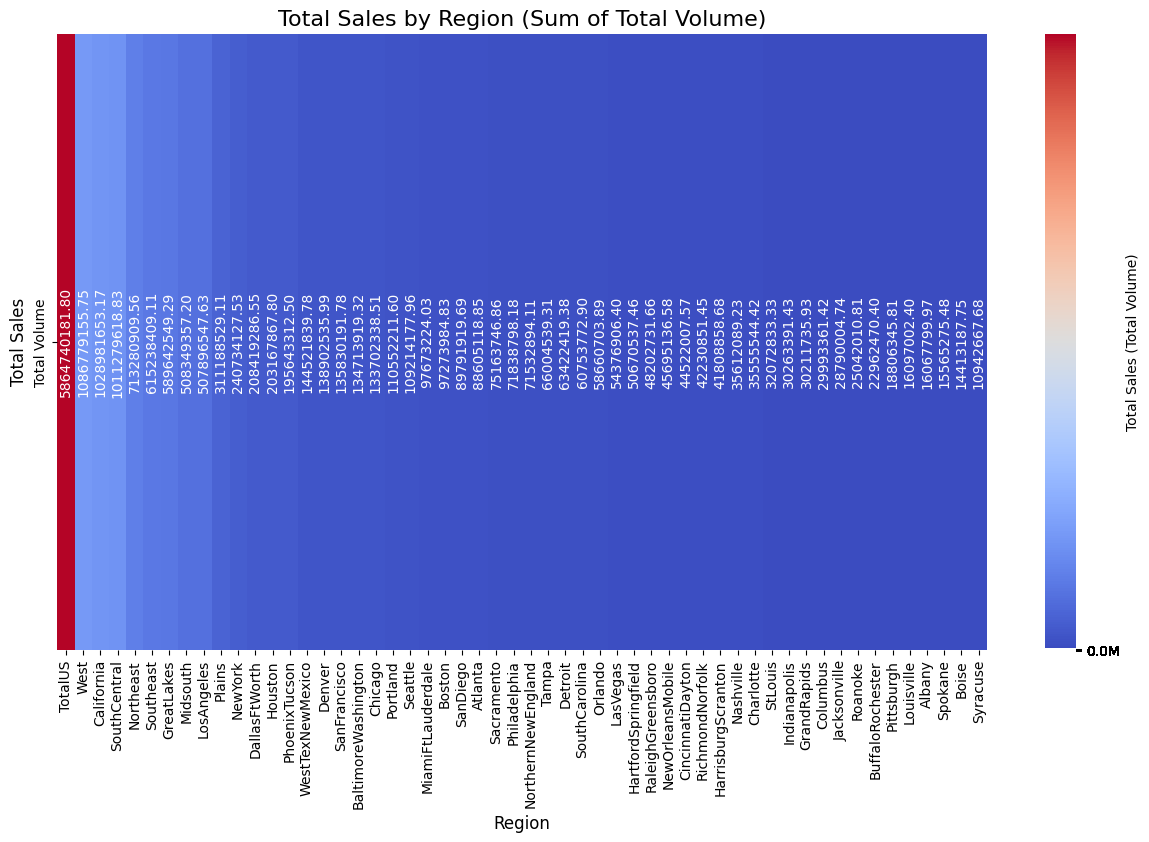

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# คำนวณยอดขายรวมของแต่ละภูมิภาค
region_sales = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False)

# เปลี่ยนข้อมูลให้เป็น DataFrame ที่เหมาะสมสำหรับ Heatmap
region_sales_df = region_sales.to_frame().T  # ทำให้ข้อมูลเป็นแถวเดียวใน DataFrame

# ฟังก์ชันสำหรับแปลงตัวเลขเป็นตัวย่อ (ล้าน)
def million_formatter(x, pos):
    return f'{x/1e6:.1f}M'

# สร้าง Heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(region_sales_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Total Sales (Total Volume)'},
            annot_kws={'rotation': 90})  # Remove cbar_ticks from here

# ใช้ FuncFormatter เพื่อแสดงผลตัวเลขในรูปแบบตัวย่อ
#🎯 Edit: Access the colorbar through the axes object (ax)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(million_formatter))

#🎯 Edit: Set the ticks on the colorbar using the colorbar's axes
cbar.set_ticks([x for x in range(0, int(region_sales.max()/1e6)+1)])

# ปรับแต่งกราฟ
plt.title('Total Sales by Region (Sum of Total Volume)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# แสดงกราฟ
plt.show()


<ipython-input-124-2f431741f24c>:14: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcor4582c/bfrz3jbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcor4582c/iwy_ak9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1613', 'data', 'file=/tmp/tmpcor4582c/bfrz3jbk.json', 'init=/tmp/tmpcor4582c/iwy_ak9f.json', 'output', 'file=/tmp/tmpcor4582c/prophet_modelrau2h393/prophet_model-20250303101918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:19:18 - cmdstanpy - I

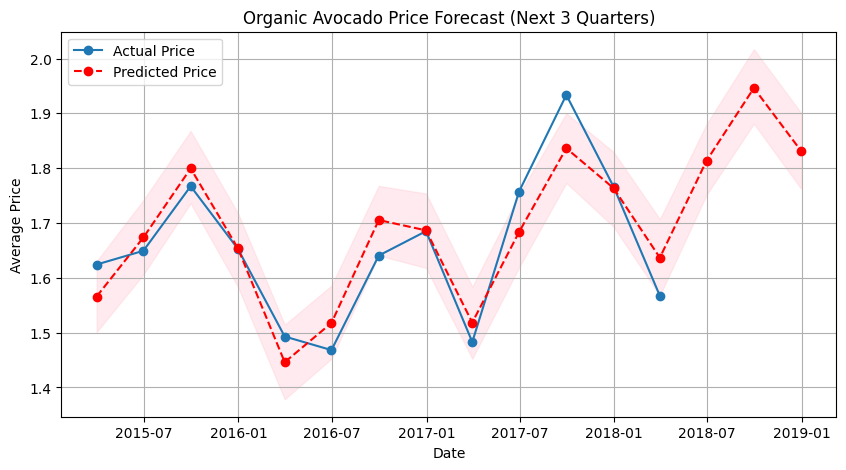

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ✅ แปลงวันที่และจัดเรียงข้อมูล
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# ✅ กรองข้อมูลเฉพาะประเภท 'organic'
df_organic = df[df['type'] == 'organic']

# ✅ รีแซมเปิลข้อมูลเป็นรายไตรมาส
# 🎯 เปลี่ยนจาก .mean() เป็น .agg({'AveragePrice': 'mean'}) และเลือกเฉพาะคอลัมน์ที่ต้องการ
df_organic_quarterly = df_organic.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()


# ✅ เตรียมข้อมูลให้ตรงกับรูปแบบของ Prophet
df_prophet = df_organic_quarterly[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# ✅ สร้างและฝึกโมเดล
model = Prophet()
model.fit(df_prophet)

# ✅ สร้างช่วงเวลาสำหรับพยากรณ์ (3 ไตรมาสข้างหน้า)
future = model.make_future_dataframe(periods=3, freq='Q')

# ✅ ทำการพยากรณ์
forecast = model.predict(future)

# ✅ พล็อตผลลัพธ์
plt.figure(figsize=(10, 5))
plt.plot(df_organic_quarterly['Date'], df_organic_quarterly['AveragePrice'], marker='o', linestyle='-', label='Actual Price')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='--', label='Predicted Price', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)  # ช่วงความมั่นใจ
plt.title('Organic Avocado Price Forecast (Next 3 Quarters)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-e8544e80b8d2>:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df_conventional.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzxxl56w/bjjntfko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzxxl56w/c3xzizns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8549', 'data', 'file=/tmp/tmpmzxxl56w/bjjntfko.json', 'init=/tmp/tmpmzxxl56w/c3xzizns.json', 'output', 'file=/tmp/tmpmzxxl56w/prophet_modelbo8hq9cn/prophet_model

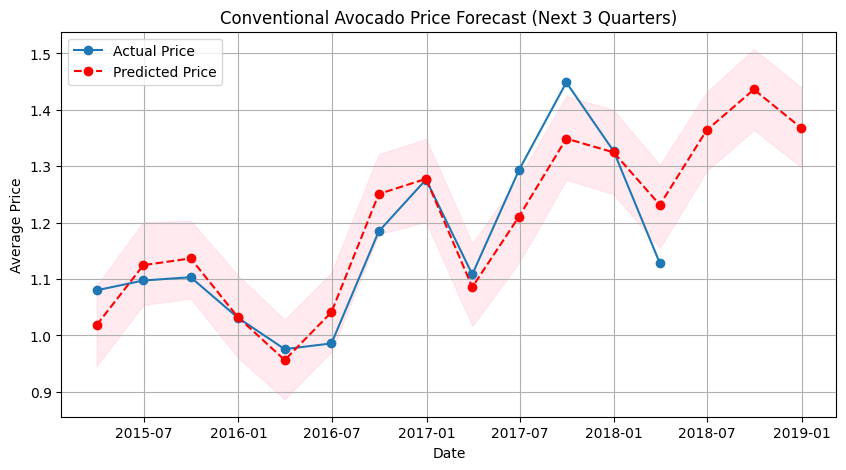

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ✅ แปลงวันที่และจัดเรียงข้อมูล
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# ✅ กรองข้อมูลเฉพาะประเภท conventional
df_conventional = df[df['type'] == 'conventional']

# ✅ รีแซมเปิลข้อมูลเป็นรายไตรมาส (ใช้ข้อมูลจากประเภท conventional)
df_quarterly = df_conventional.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()

# ✅ เตรียมข้อมูลให้ตรงกับรูปแบบของ Prophet
df_prophet = df_quarterly[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# ✅ สร้างและฝึกโมเดล
model = Prophet()
model.fit(df_prophet)

# ✅ สร้างช่วงเวลาสำหรับพยากรณ์ (3 ไตรมาสข้างหน้า)
future = model.make_future_dataframe(periods=3, freq='Q')

# ✅ ทำการพยากรณ์
forecast = model.predict(future)

# ✅ พล็อตผลลัพธ์
plt.figure(figsize=(10, 5))
plt.plot(df_quarterly['Date'], df_quarterly['AveragePrice'], marker='o', linestyle='-', label='Actual Price')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='--', label='Predicted Price', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)  # ช่วงความมั่นใจ
plt.title('Conventional Avocado Price Forecast (Next 3 Quarters)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# ✅ ดึงค่าพยากรณ์เฉพาะช่วงที่มีข้อมูลจริง
forecast_actual = forecast[forecast['ds'].isin(df_quarterly['Date'])]

# ✅ คำนวณ MSE
mse = mean_squared_error(df_quarterly['AveragePrice'], forecast_actual['yhat'])
print(f'MSE: {mse}')


MSE: 0.002861706468938461


<ipython-input-11-02d27cd9e2fa>:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzxxl56w/nbh640rx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmzxxl56w/xoo9fe50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28968', 'data', 'file=/tmp/tmpmzxxl56w/nbh640rx.json', 'init=/tmp/tmpmzxxl56w/xoo9fe50.json', 'output', 'file=/tmp/tmpmzxxl56w/prophet_modelsp7uss7d/prophet_model-20250313100

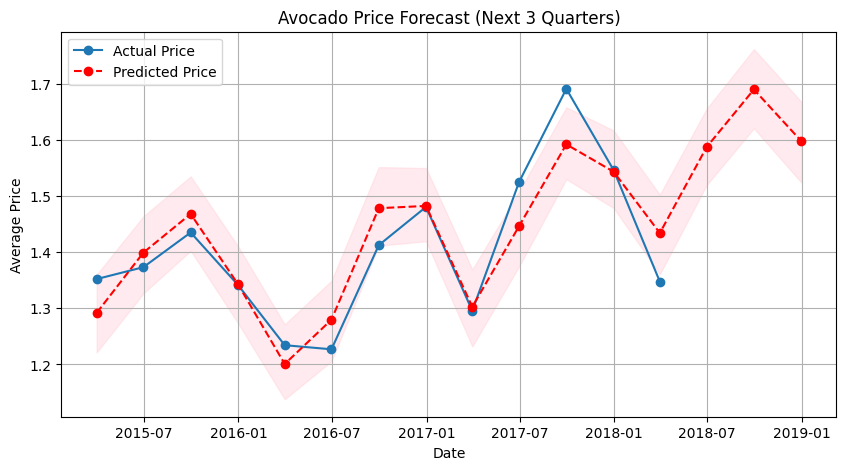

In [ ]:
#โดยรวมทั้ง 2
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ✅ แปลงวันที่และจัดเรียงข้อมูล
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# ✅ รีแซมเปิลข้อมูลเป็นรายไตรมาส
# 🎯 เปลี่ยนจาก .mean() เป็น .agg({'AveragePrice': 'mean'}) และเลือกเฉพาะคอลัมน์ที่ต้องการ
df_quarterly = df.resample('Q', on='Date').agg({'AveragePrice': 'mean'}).reset_index()


# ✅ เตรียมข้อมูลให้ตรงกับรูปแบบของ Prophet
df_prophet = df_quarterly[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# ✅ สร้างและฝึกโมเดล
model = Prophet()
model.fit(df_prophet)

# ✅ สร้างช่วงเวลาสำหรับพยากรณ์ (3 ไตรมาสข้างหน้า)
future = model.make_future_dataframe(periods=3, freq='Q')

# ✅ ทำการพยากรณ์
forecast = model.predict(future)

# ✅ พล็อตผลลัพธ์
plt.figure(figsize=(10, 5))
plt.plot(df_quarterly['Date'], df_quarterly['AveragePrice'], marker='o', linestyle='-', label='Actual Price')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='--', label='Predicted Price', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)  # ช่วงความมั่นใจ
plt.title('Avocado Price Forecast (Next 3 Quarters)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ✅ ดึงค่าพยากรณ์เฉพาะช่วงที่มีข้อมูลจริง
forecast_actual = forecast[forecast['ds'].isin(df_quarterly['Date'])]

# ✅ คำนวณ MSE
mse = mean_squared_error(df_quarterly['AveragePrice'], forecast_actual['yhat'])
rmse = np.sqrt(mse)  # คำนวณ RMSE

# ✅ แสดงผล
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 0.002861706468938461
RMSE: 0.053494920029274376


<ipython-input-128-5d86c6c035c5>:14: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcor4582c/aya48akb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcor4582c/8b97ibhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13390', 'data', 'file=/tmp/tmpcor4582c/aya48akb.json', 'init=/tmp/tmpcor4582c/8b97ibhe.json', 'output', 'file=/tmp/tmpcor4582c/prophet_model4kuveb_r/prophet_model-20250303103126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:31:26 - cmdstanpy - 

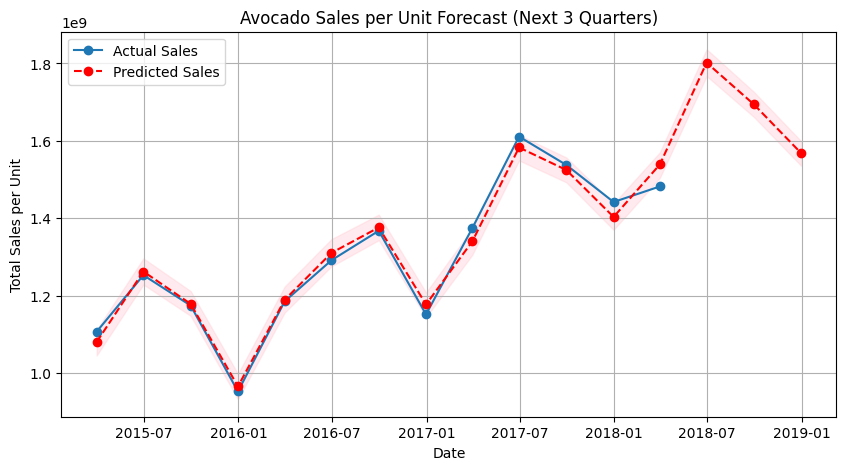

In [ ]:
#ทำนายยอดขายต่อชิ้น
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ✅ แปลงวันที่และจัดเรียงข้อมูล
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# ✅ คำนวณยอดขายต่อชิ้น (Total Sales per Unit)
df['Total Sales'] = df['Total Volume'] * df['AveragePrice']

# ✅ รีแซมเปิลข้อมูลเป็นรายไตรมาส (เพื่อดูผลเฉลี่ยในแต่ละไตรมาส)
df_quarterly = df.resample('Q', on='Date').agg({'Total Sales': 'sum'}).reset_index()

# ✅ เตรียมข้อมูลให้ตรงกับรูปแบบของ Prophet
df_prophet = df_quarterly[['Date', 'Total Sales']].rename(columns={'Date': 'ds', 'Total Sales': 'y'})

# ✅ สร้างและฝึกโมเดล
model = Prophet()
model.fit(df_prophet)

# ✅ สร้างช่วงเวลาสำหรับพยากรณ์ (3 ไตรมาสข้างหน้า)
future = model.make_future_dataframe(periods=3, freq='Q')

# ✅ ทำการพยากรณ์
forecast = model.predict(future)

# ✅ พล็อตผลลัพธ์
plt.figure(figsize=(10, 5))
plt.plot(df_quarterly['Date'], df_quarterly['Total Sales'], marker='o', linestyle='-', label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='--', label='Predicted Sales', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)  # ช่วงความมั่นใจ
plt.title('Avocado Sales per Unit Forecast (Next 3 Quarters)')
plt.xlabel('Date')
plt.ylabel('Total Sales per Unit')
plt.legend()
plt.grid(True)
plt.show()
